# Visualizing distributions

say I want a 2d normal or gaussian distribution, how can I generate one? and how can I prove computationally I have one? 

In [3]:
import numpy as np 
import matplotlib.pyplot as plt


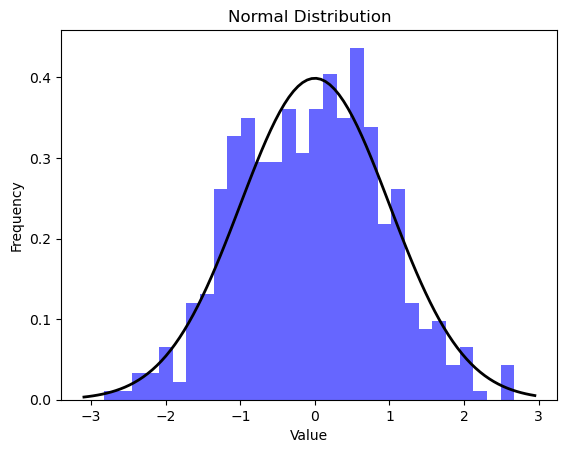

In [7]:
mu = 0 # mean 
sigma = 1 # standard deviation
samples = 500 # number of samples 

data = np.random.normal(mu,sigma,samples)

# Plot the histogram
plt.hist(data, bins=30, density=True, alpha=0.6, color='b')

# Overlay the theoretical normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
plt.plot(x, p, 'k', linewidth=2)

plt.title("Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

it seems generating numbers that form a normal or gaussian distribution is more non-trivial than expected, but realized it is not key to understand distributions per se

What about 2d? 

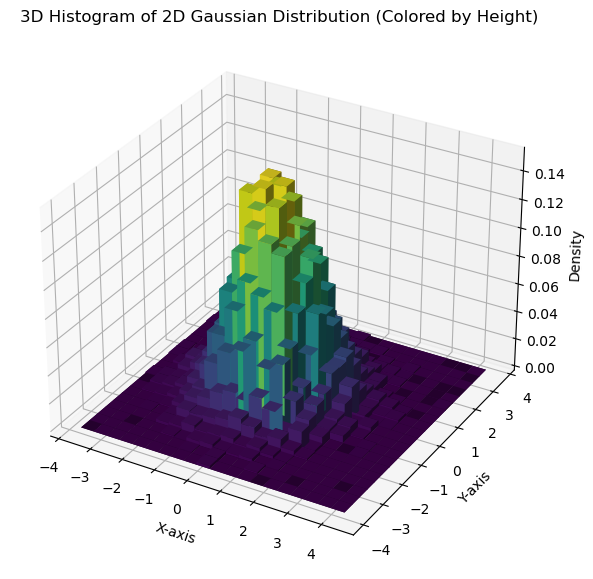

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Parameters for the 2D Gaussian
mean = [0, 0]  # Mean for x and y
covariance = [[1, 0], [0, 1]]  # Covariance matrix

# Generate samples from the 2D Gaussian
samples = 10000
data = np.random.multivariate_normal(mean, covariance, samples)
x, y = data.T

# Create a 2D histogram with bins
bins = 20
hist, xedges, yedges = np.histogram2d(x, y, bins=bins, density=True)

# Construct the positions and heights for the 3D bars
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)

# Dimensions of the bars
dx = dy = (xedges[1] - xedges[0])  # Width of each bin
dz = hist.ravel()  # Height of each bin

# Normalize the heights for color mapping
norm = plt.Normalize(dz.min(), dz.max())
colors = cm.viridis(norm(dz))  # Use the 'viridis' color map

# Plot the 3D histogram
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors, zsort='average')

ax.set_title("3D Histogram of 2D Gaussian Distribution (Colored by Height)")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Density")
plt.show()


In [ ]:
# interactive gaussian distribution

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def plot_normal_distribution(mean=0, std_dev=1):
    x = np.linspace(-10, 10, 500)
    y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, label=f"mean={mean}, std_dev={std_dev}")
    plt.title("Normal Distribution")
    plt.xlabel("x")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True)
    plt.show()

interact(plot_normal_distribution, mean=(-5, 5, 0.1), std_dev=(0.1, 5, 0.1))


interactive(children=(FloatSlider(value=0.0, description='mean', max=5.0, min=-5.0), FloatSlider(value=1.0, de…

<function __main__.plot_normal_distribution(mean=0, std_dev=1)>

Taking a sample 

In [3]:
import numpy as np

# Parameters for the normal distribution
mu = 0  # Mean
sigma = 1  # Standard deviation

# Take 10 samples from the distribution
samples = np.random.normal(mu, sigma, 10)
print(samples)


[ 0.77280482  0.5704431  -0.11121584 -1.11179583  0.53368812  0.33989096
  1.40714778 -0.36272108 -0.39003849 -1.10871799]


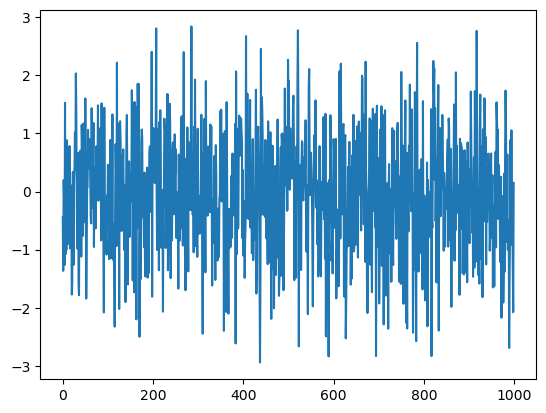

In [5]:
plt.plot(samples)
